# **Using PCA to reduce the dimensions of images**

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from numpy import random
from sklearn.metrics import mean_squared_error

In [4]:
train_img = np.loadtxt("train.csv", delimiter=",",dtype = int)
test_img = np.loadtxt("test.csv",delimiter=",",dtype = int)

In [5]:
train_img = train_img[1:,:]
test_img = test_img[1:,:]

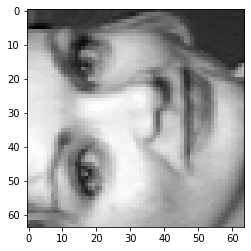

In [6]:
plt.imshow(train_img[1].reshape((64,64)), cmap = plt.cm.gray)
plt.show()

In [7]:
mse_models = {}

In [8]:
dimension = [240,200,140,100,70,45,30,15,8,3]


In [9]:
def train_pca (X,n_comp,n_iter=10 , n_splits = 5):
  random.seed(1)
  score=[]
  train_score=[]
  rmse =[]
  train_rmse=[]
  for i in range(n_iter):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    kf = KFold(n_splits=n_splits , random_state=42,shuffle=True)
    for train, test in kf.split(X):
      X_train = X[train]
      X_test = X[test]

      pca = PCA(n_components=n_comp)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.transform(X_test)
      inv_test = pca.inverse_transform(X_test_pca)
      inv_train = pca.inverse_transform(X_train_pca)
      train_score.append(mean_squared_error(X_train,inv_train))
      score.append(mean_squared_error (X_test,inv_test))
      rmse.append(mean_squared_error (X_test,inv_test,squared=False))
      train_rmse.append(mean_squared_error (X_train,inv_train,squared=False))
  return score,np.mean(score),np.mean(train_score),np.mean(rmse) , train_score,rmse,train_rmse


In [10]:
models={}
mse_models={}
rmse_models={}
for dim in dimension:
  mse_arr , val_mse , train_mse,rmse,t_score,val_rmse,t_rmse = train_pca(train_img,dim)
  mse_models[dim]={}
  models[dim]={}
  rmse_models[dim]={}
  mse_models[dim]['train']=train_mse
  mse_models[dim]['val']=val_mse
  mse_models[dim]['rmse_val']=rmse
  models[dim]['train']=t_score
  models[dim]['val']=mse_arr
  rmse_models[dim]['train rmse']=t_rmse
  rmse_models[dim]['val rmse']=val_rmse

In [11]:
mse_models

{240: {'train': 6.820222788133523e-27,
  'val': 120.19801640053974,
  'rmse_val': 10.573522239130842},
 200: {'train': 5.204601665617847,
  'val': 128.14109178337102,
  'rmse_val': 10.902311039251895},
 140: {'train': 24.70105445208584,
  'val': 145.74499166435137,
  'rmse_val': 11.607960565978631},
 100: {'train': 51.1544034824106,
  'val': 166.0551664426179,
  'rmse_val': 12.380576669798725},
 70: {'train': 85.86905718876908,
  'val': 190.64830290077222,
  'rmse_val': 13.26656023841516},
 45: {'train': 136.6605781028942,
  'val': 225.7065113276364,
  'rmse_val': 14.455090227701762},
 30: {'train': 189.94208523679166,
  'val': 263.70449996073205,
  'rmse_val': 15.653386683541932},
 15: {'train': 303.1515576312355,
  'val': 361.54780947097044,
  'rmse_val': 18.3622403772968},
 8: {'train': 420.2766980519074,
  'val': 462.7459567454227,
  'rmse_val': 20.816741815102958},
 3: {'train': 605.9433596184896,
  'val': 629.233230152488,
  'rmse_val': 24.181480297239712}}

In [12]:
pca = PCA(300)
pca.fit(train_img)

PCA(n_components=300)

Text(0, 0.5, 'Cumulative explained variance')

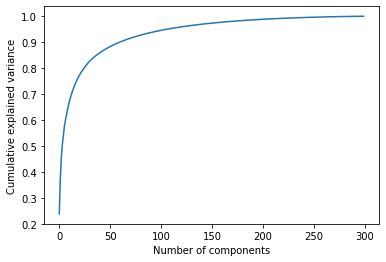

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

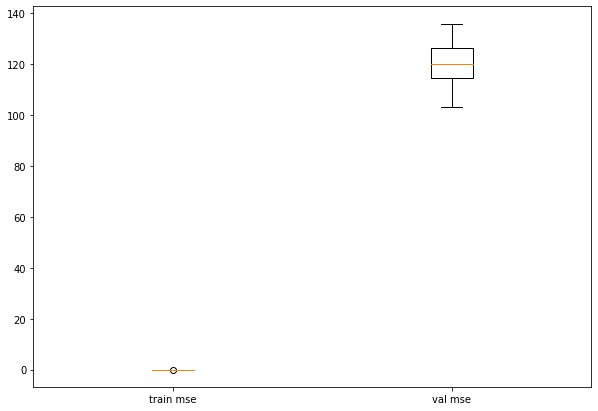

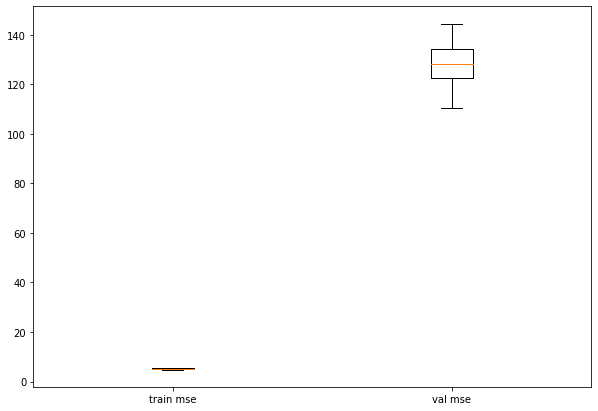

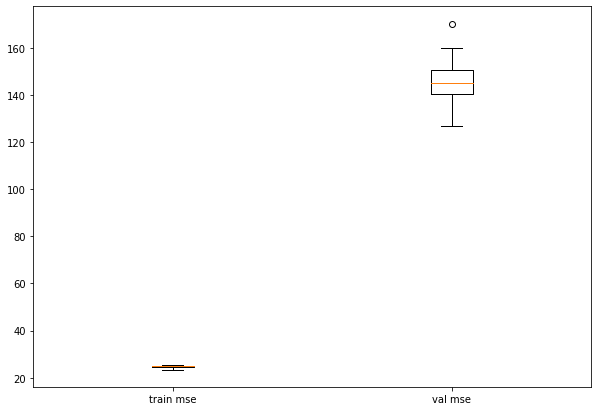

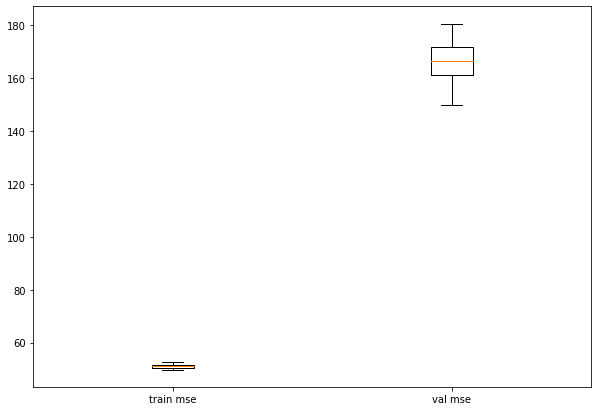

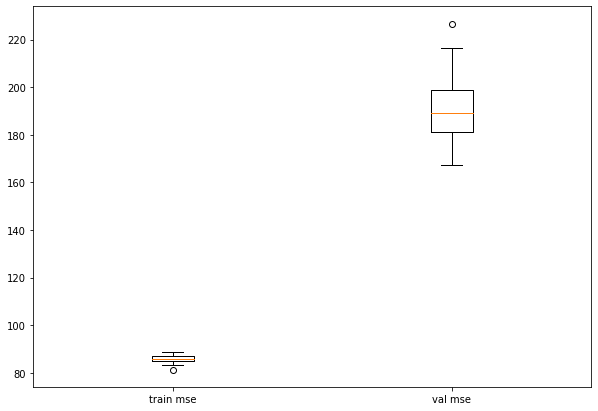

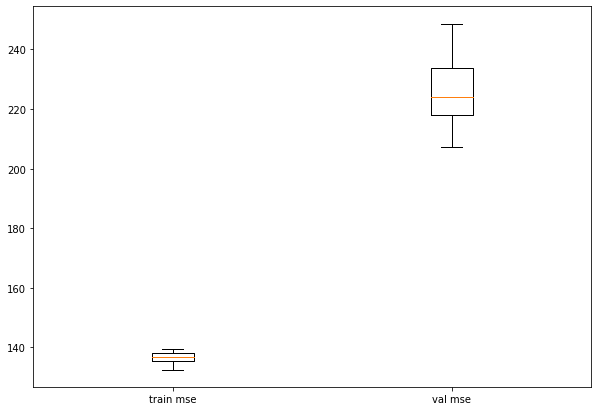

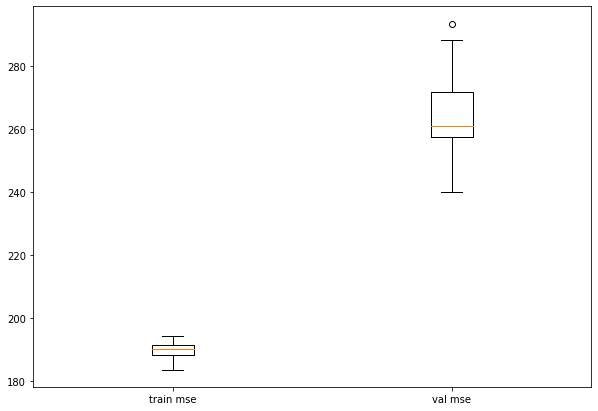

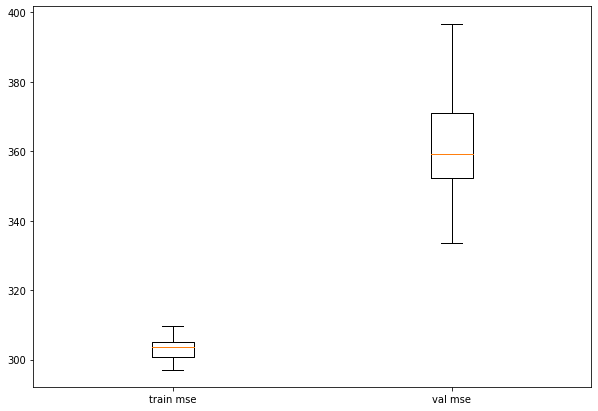

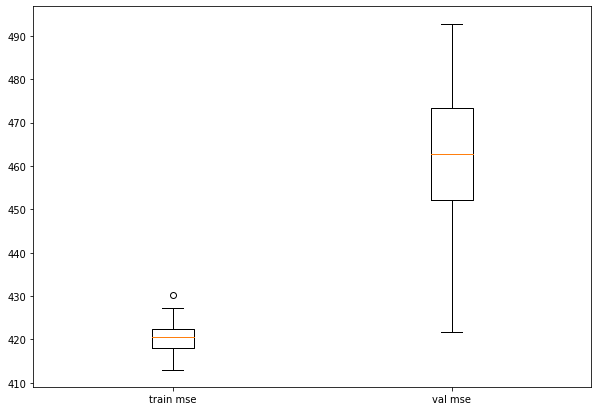

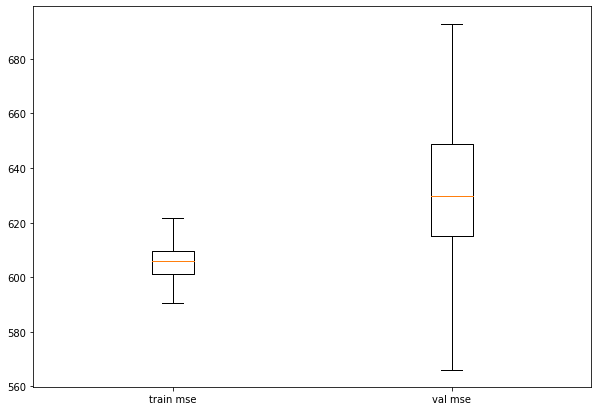

In [14]:
for dim in dimension:
  fig = plt.figure(figsize =(10, 7))
  x0=models[dim]['train']
  x1=models[dim]['val']
  plt.boxplot(x=[x0,x1],labels=("train mse","val mse",))
  plt.show()

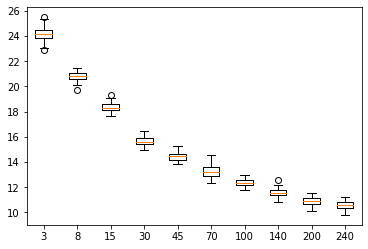

In [16]:
x0=rmse_models[3]['val rmse']
x1=rmse_models[8]['val rmse']
x2=rmse_models[15]['val rmse']
x3=rmse_models[30]['val rmse']
x4=rmse_models[45]['val rmse']
x5=rmse_models[70]['val rmse']
x6=rmse_models[100]['val rmse']
x7=rmse_models[140]['val rmse']
x8=rmse_models[200]['val rmse']
x9=rmse_models[240]['val rmse']
plt.boxplot(x=[x0,x1,x2,x3,x4,x5,x6,x7,x8,x9],
            labels=("3","8",'15','30','45','70','100','140','200','240'))
plt.show()

PCA with number of components : 45


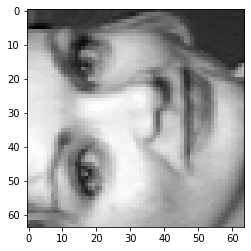

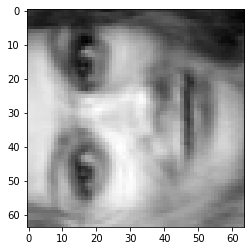

PCA with number of components : 70


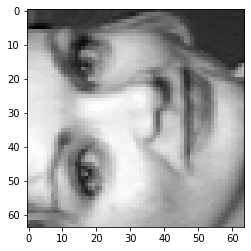

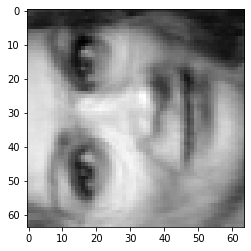

PCA with number of components : 100


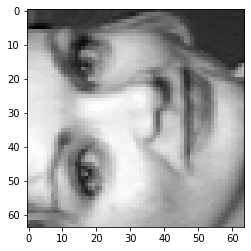

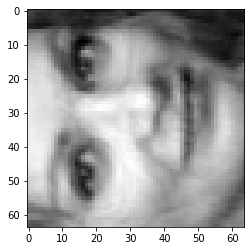

PCA with number of components : 150


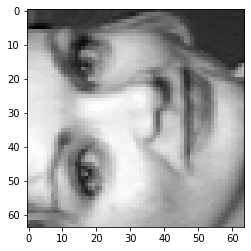

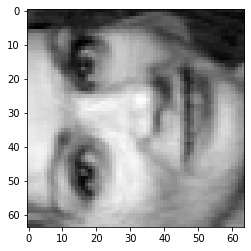

PCA with number of components : 200


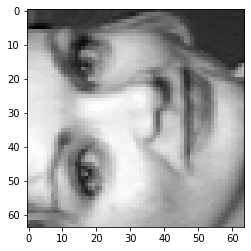

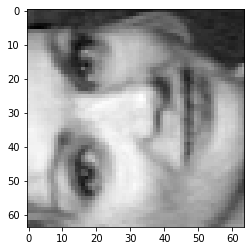

In [18]:
for i in [45,70,100,150,200]:
  pca_ = PCA(i)
  pca_x = pca_.fit_transform(train_img)
  inv_x = pca_.inverse_transform(pca_x)
  print ('PCA with number of components :' , i)
  plt.imshow(train_img[1].reshape((64,64)), cmap = plt.cm.gray)
  plt.show()

  plt.imshow(inv_x[1].reshape((64,64)), cmap = plt.cm.gray)
  plt.show()

In [19]:
pca_300=PCA(300)
pca_300.fit(train_img)

PCA(n_components=300)

In [20]:
X_test = pca_300.transform(test_img)
inv_test_300=pca_300.inverse_transform(X_test)

In [21]:
mean_squared_error (test_img,inv_test_300)

100.36335511064637

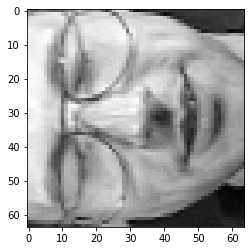

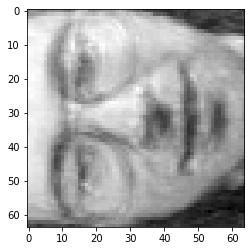

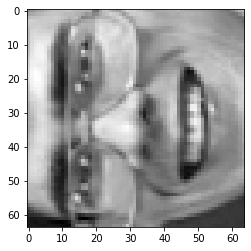

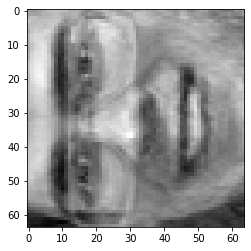

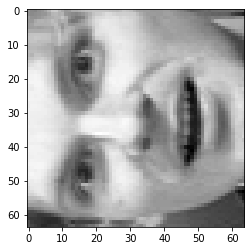

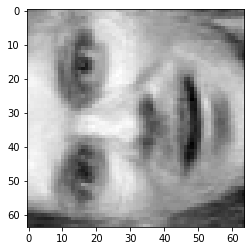

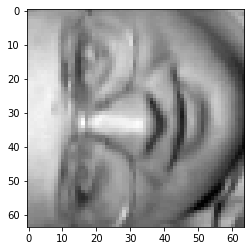

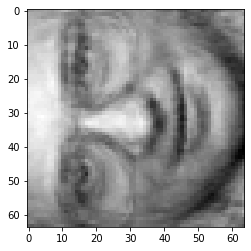

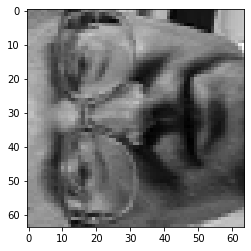

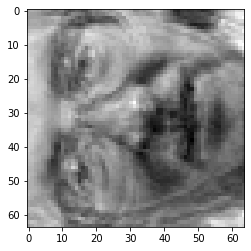

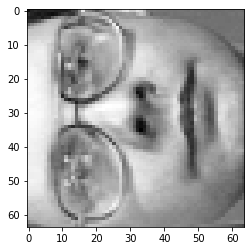

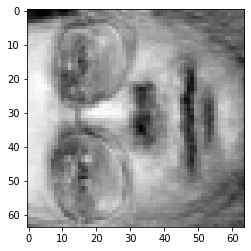

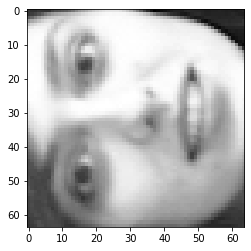

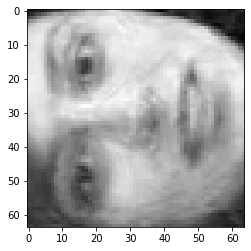

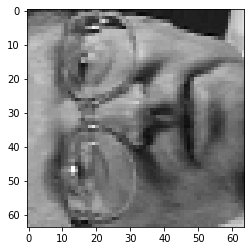

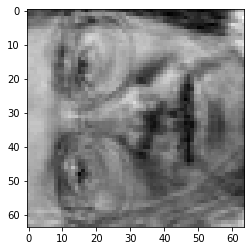

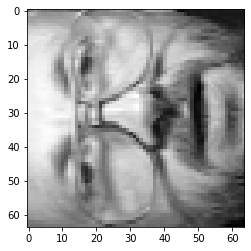

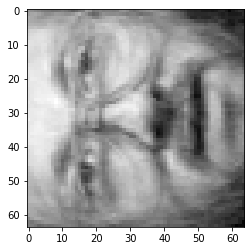

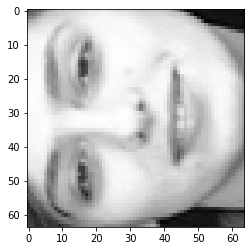

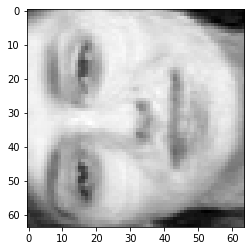

In [22]:
for i in range(10):
  
  plt.imshow(test_img[i].reshape((64,64)), cmap = plt.cm.gray)
  plt.show()

  plt.imshow(inv_test_300[i].reshape((64,64)), cmap = plt.cm.gray)
  plt.show()